# Natural Language Processing
After attending the workshops by Olaf Janssen [\[1\]](#References) on Natural Language Processing (NLP), <br>
it is time to start playing with state-of-the-art NLP pre-trained models, such as BERT (and derivatives such as ALBERT and RoBERTa), GPT-2 or XLNET. <br>
<br>
The assignment is to first pick a NLP task (such as Q&A, search engine, chatbot, classification, etc.). <br>
Then to choose a context wherein this task is being ran (such as a game, a service, smart applications, etc.). <br>
And, build it! <br>
The idea is that the student will be working with pre-trained models and that the focus is primarily on designing the right pipeline for the problem at hand. <br>
Endlessly fine-tuning the model is not a priority in this assignment; the goal is to demonstrate that the student understands how a NLP task is build up and can apply NLP techniques. <br>
The result must be an interactive prototype that tackles a specific NLP task.

# Introduction
This notebook will contain my NLP learning journey throughout the assignment. <br>
Before diving into the assignment for the workshop, I will first experiment with NLP pipelines. <br>
I do this because it helps me better understand how NLP libraries are used. <br>
Afterwards, I will explain the task I have chosen and how I plan to approach it. <br>
Lastly, I will conclude my learning journey with an interactive version of my NLP model. 

# Preparation
In this section useful libraries are imported which are used in most data science projects.

In [1]:
import os
import sys
from dotenv import load_dotenv

# sets the path to the home directory of this repository so other modules can be imported. 
project_path = os.getcwd()
load_dotenv(os.path.join(project_path, '.env'))

root_path = os.path.split(os.path.split(os.getcwd())[0])[0]
assert root_path.endswith("Fontys-ADS"), "The root path does not end with Fontys-ADS: " + root_path 
sys.path.insert(0, root_path)

import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
import matplotlib.pyplot as plt

transformers.logging.set_verbosity(40)
# set the seed for reproducible results.
np.random.seed(56)
tf.random.set_seed(56)

# optionally, set TensorFlow to use the GPU with all available memory.
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Information about the installed packages:

In [2]:
print(f'transformers=={transformers.__version__}')
print(f'numpy=={np.__version__}')
print(f'tensorflow=={tf.__version__}')

transformers==3.5.1
numpy==1.19.2
tensorflow==2.3.0


# Hands-On with NLP pipelines
For the experimenting with NLP pipelines I found the library transformers from huggingface [\[2\]](#References). <br>
It has a simple to use API and has support for many NLP models. <br>
I will experiment with a few different NLP tasks using the pipeline API.

In [3]:
from transformers import pipeline

## Text generation pipeline
For text generation, I started with creating a pipeline with a GPT2 (small) pre-trained model. <br>
But the small GPT2 model did not produce good enough outputs. So, I swapped out the small model for the large model.

In [4]:
text_gen = pipeline("text-generation", model="gpt2-large")

And tried a few different text-generation continuations....

In [7]:
result = text_gen("Many moons ago", max_length=100)
display(result[0]['generated_text'])

'Many moons ago it had looked as if this island, in these waters, might belong to us. We now know, however, that what we took from the islands of the sea must have been of great value. And we were able to draw from this island a rich vein of gold. And it was known among us, in those days, as a place where the gold was in greatest demand. We did not have the means to mine it ourselves, so we sent people along the coast to find'

The pipeline resulted in some interesting continuations:
- <b> Providing "In a forgotten land, far far away, ", resulted in: </b> <br> 
"In a forgotten land, far far away, are the only things left: the walls from which I was to die, and the sun that shone when I slept. Therein lies a world of promise. And it I have known all"
- <b> Providing "Have you read Olaf's NLP blog post?", resulted in: </b> <br> 
"Have you read Olaf's NLP blog post? It's the most useful thing I've read on NLP, ever. (And you should read it.)\n\nAdvertisements\n\nLike this: Like Loading... Related\n\nPosted in Unc"
- <b> Providing "In a galaxy far away, the sith are preparing for", resulted in: </b> <br> 
"In a galaxy far away, the sith are preparing for a grand festival. The Sith Lord, Darth Vader, is about to make his grand return. As a reward for his master's treachery, Vader himself is given the title of Darth Vader"

Not every continuation makes sense. It also feels like it is just spitting out text it has read before from blog posts, or the like.

## Question & Answer pipeline
For the question and answer task, I can also provide a context for the model to answer questions on. <br>
For this model, I chose the most popular question-answering model on huggingface's website.

In [5]:
nlp = pipeline("question-answering", model="deepset/bert-large-uncased-whole-word-masking-squad2")

The context I provide is about a band I was listening to during the making of this notebook.

In [6]:
context = r"""
The band Æther Realm has a song called The Sun, The Moon, The Stars which is 20 minutes in length.
The Sun, The Moon, The Stars is most known for its lengthy guitar riffs and melodies.
But I also like the song called The Fool which is only 4 minutes in length.
After playing the 20 minute song, I played the rest of the album.
"""

The questions I ask below all belong to the context, so they should be answerable.

In [7]:
result = nlp(question="What is the name of the song which is 20 minutes in  length?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is the name of the band which has a song of 20 minutes in length?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What happened after listening to The Sun, The Moon, The Star?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="Which song did I like?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is the name of the shortest song?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is the name of the lengthiest song?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'The Sun, The Moon, The Stars', score: 0.9546, start: 40, end: 68
Answer: 'Æther Realm', score: 0.9729, start: 10, end: 21
Answer: 'I played the rest of the album.', score: 0.0283, start: 296, end: 327
Answer: 'The Fool', score: 0.9815, start: 218, end: 226
Answer: 'The Fool', score: 0.0494, start: 218, end: 226
Answer: 'The Sun, The Moon, The Stars', score: 0.0472, start: 40, end: 68


The questions below are not explained in the context and should not be answerable.

In [10]:
result = nlp(question="Who is the lead singer of the band?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What genre is this band?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Æther Realm', score: 0.0, start: 10, end: 21
Answer: 'Æther Realm', score: 0.2439, start: 10, end: 21


The six questions it was able to answer, it did succesfully. <br>
The two questions it should not be able to answer, failed to be answered. <br>

## Translation pipeline
For the translation pipeline, there are also many models available. <br>
I have chosen the T5 model to translate English to German. <br>

In [19]:
translator = pipeline("translation_en_to_de", model="t5-large")

In [22]:
translation = translator("My bike is stolen.", max_length=40)
translation[0]['translation_text']

'Mein Fahrrad ist gestohlen.'

I have not had German in years, but I am fairly sure that this translation is correct.

# NLP Assignment
For the NLP assignment, I was curious whether I could create a rapping NLP model. <br>
So, the task at hand is `Text Generation`. <br>


## Gathering data
I have chosen to create a model based on the top 100 songs of Eminem according to the Genius API [\[3\]](#References). <br>

In [164]:
import lyricsgenius

# API key for GENIUS lyrics.
GENIUS_KEY = os.getenv("GENIUS_KEY")

genius = lyricsgenius.Genius(GENIUS_KEY)
genius.remove_section_headers = True
artist = genius.search_artist('Eminem', max_songs=100, sort='popularity')

Searching for songs by Eminem...

Song 1: "Rap God"
Song 2: "Killshot"
Song 3: "Godzilla"
Song 4: "Lose Yourself"
Song 5: "The Monster"
Song 6: "Lucky You"
Song 7: "The Ringer"
Song 8: "River"
Song 9: "Venom"
Song 10: "Berzerk"
Song 11: "Stan"
Song 12: "Not Alike"
Song 13: "Fall"
Song 14: "Without Me"
Song 15: "The Real Slim Shady"
Song 16: "Kamikaze"
Song 17: "Walk on Water"
Song 18: "’Till I Collapse"
Song 19: "Love the Way You Lie"
Song 20: "Bad Guy"
Song 21: "8 Mile: B-Rabbit vs Papa Doc"
Song 22: "Mockingbird"
Song 23: "Not Afraid"
Song 24: "Headlights"
Song 25: "Survival"
Song 26: "No Love"
Song 27: "Beautiful"
Song 28: "Greatest"
Song 29: "When I’m Gone"
Song 30: "Love Game"
Song 31: "Cleanin’ Out My Closet"
Song 32: "My Name Is"
Song 33: "The Way I Am"
Song 34: "Legacy"
Song 35: "Superman"
Song 36: "Space Bound"
Song 37: "Unaccommodating"
Song 38: "Like Toy Soldiers"
Song 39: "Guts Over Fear"
Song 40: "Sing for the Moment"
Song 41: "Marshall Mathers"
Song 42: "Stronger Than I W

## Preprocessing data
The songs that are gathered from genius have a lot of gibberish in the text. <br>
Like backings (Ahh!), (Yeah), etc. or section headers: \[Intro\], \[Verse\], \[Chorus\], etc. <br> 
Also, the lyrics contain a lot of contractions since in spoken language it is easier to say or rhymes better.<br>
These problems have to be fixed first before the text is provided to the model.

In [184]:
df = pd.DataFrame([x.to_dict() for x in artist.songs])
df

,title,album,year,lyrics,image
0,Rap God,The Marshall Mathers LP2 (Deluxe),2013-10-15,"""Look, I was gonna go easy on you not to hurt ...",https://images.genius.com/058e2359838c93395c36...
1,Killshot,None,2018-09-14,"You sound like a bitch, bitch\nShut the fuck u...",https://images.genius.com/b1da996dcb2acb56506b...
2,Godzilla,Music to Be Murdered By,2020-01-17,"Ugh, you're a monster\n\nI can swallow a bottl...",https://images.genius.com/e7ec9f0d94b506dadfc6...
3,Lose Yourself,The Singles,2002-10-28,"Look, if you had one shot or one opportunity\n...",https://images.genius.com/ce61c1b2664c5952984e...
4,The Monster,The Marshall Mathers LP2 (Deluxe),2013-10-29,I'm friends with the monster that's under my b...,https://images.genius.com/f8e3befb0dfae2eaa683...
...,...,...,...,...,...
95,8 Mile,8 Mile: Music from and Inspired by the Motion ...,2002-10-29,"It's alright, it's okay\nI'm gonna make it any...",https://images.genius.com/e4a1bd93e045b909843d...
96,Going Through Changes,Recovery,2010-06-18,I'm going through changes\nI'm going through c...,https://images.genius.com/7b93181ae4ed594c902b...
97,Cinderella Man,Recovery,2010-06-18,"Yeah, you know, technically\nI'm not even real...",https://images.genius.com/8267d6f45cdffed8db78...
98,We Made You,Relapse,2009-04-07,"Guess who? D'you miss me?\nJessica Simpson, si...",https://images.genius.com/a48fd426b229131bae8b...


In [185]:
import string
import re

def preprocess_lyrics(sentence):
    # ensure every word is lower case.
    sentence = sentence.lower()
    sentence = sentence.encode("utf8").decode("ascii",'ignore')
    # ensure all section headers are removed. 
    sentence = re.sub(r'\[.*?\]', "", sentence)
    sentence = re.sub(r'\(.*?\)', "", sentence)
    # ensure that all apostrophes are correctly written.
    sentence = re.sub(r"’", "\'", sentence) 
    sentence = re.sub(r"‘", "\'", sentence)
    # remove all contractions.
    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"there's", "there is", sentence)
    sentence = re.sub(r"who's", "who is", sentence)
    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"\'bout", "about", sentence)
    sentence = re.sub(r"'til", "until", sentence)
    sentence = re.sub(r"c'mon", "come on", sentence)
    sentence = re.sub(r"d'you", "do you", sentence)
    sentence = re.sub(r"\'cause", "because", sentence)
    sentence = re.sub(r"mo'", "more", sentence)
    sentence = re.sub(r"24/7", "twentyfour seven", sentence)
    # remove new lines and tabs.
    sentence = re.sub("\n", " ", sentence)
    sentence = re.sub(r"\t", "", sentence)
    # ensure double or triple spaces are removed.
    sentence = re.sub(r"  ", " ", sentence)
    sentence = re.sub(r"   ", " ", sentence)
    sentence = re.sub(r"  ", " ", sentence)
    # remove any left over string punctuations.
    sentence = "".join(v for v in sentence if v not in string.punctuation)
    # remove any last whitespace and split by word.
    return sentence.strip()
    
df.lyrics = df.lyrics.apply(preprocess_lyrics)
df

,title,album,year,lyrics,image
0,Rap God,The Marshall Mathers LP2 (Deluxe),2013-10-15,look i was gonna go easy on you not to hurt yo...,https://images.genius.com/058e2359838c93395c36...
1,Killshot,None,2018-09-14,you sound like a bitch bitch shut the fuck up ...,https://images.genius.com/b1da996dcb2acb56506b...
2,Godzilla,Music to Be Murdered By,2020-01-17,ugh you are a monster i can swallow a bottle o...,https://images.genius.com/e7ec9f0d94b506dadfc6...
3,Lose Yourself,The Singles,2002-10-28,look if you had one shot or one opportunity to...,https://images.genius.com/ce61c1b2664c5952984e...
4,The Monster,The Marshall Mathers LP2 (Deluxe),2013-10-29,i am friends with the monster that is under my...,https://images.genius.com/f8e3befb0dfae2eaa683...
...,...,...,...,...,...
95,8 Mile,8 Mile: Music from and Inspired by the Motion ...,2002-10-29,it is alright it is okay i am gonna make it an...,https://images.genius.com/e4a1bd93e045b909843d...
96,Going Through Changes,Recovery,2010-06-18,i am going through changes i am going through ...,https://images.genius.com/7b93181ae4ed594c902b...
97,Cinderella Man,Recovery,2010-06-18,yeah you know technically i am not even really...,https://images.genius.com/8267d6f45cdffed8db78...
98,We Made You,Relapse,2009-04-07,guess who dyou miss me jessica simpson sing th...,https://images.genius.com/a48fd426b229131bae8b...


After the initial data is gathered, the data is stored to disk to prevent having to call to the genius api everytime. <br>
The lyrics is now also split by word for the tokenizing process.

In [ ]:
df.to_csv('preprocessed_eminem_lyrics.csv', index=False)

In [3]:
df = pd.read_csv('preprocessed_eminem_lyrics.csv')
df.lyrics = df.lyrics.apply(str.split)

Next up, is to start tokenizing the lyrics.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.lyrics)
total_words = len(tokenizer.word_index) + 1
print(f"Eminem's unique words from top 100 songs: {total_words}")

Eminem's unique words from top 100 songs: 9307


Text(0.5, 0.98, 'Top 25 unique word count in top 100 songs by Eminem')

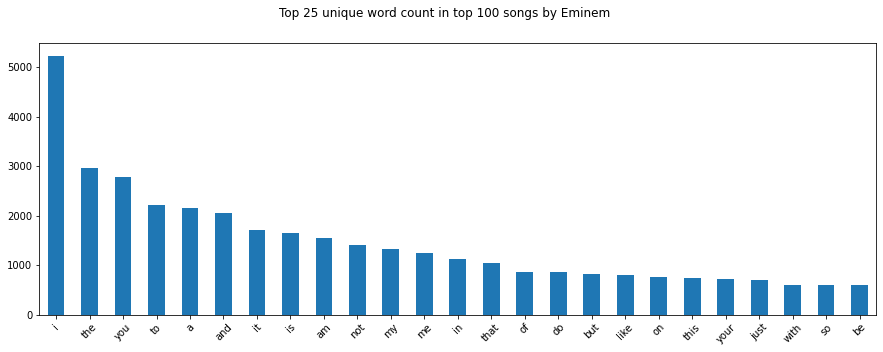

In [5]:
fig = plt.figure(figsize=(15, 5))
df.lyrics.explode().value_counts()[:25].plot.bar()
plt.xticks(rotation=45)
fig.suptitle('Top 25 unique word count in top 100 songs by Eminem')

The lyrics are then transformed into n-grams to create contiguous sequences. <br>
Since the goal is to predict what the next word in the sentence should be. <br>

In [6]:
input_sequences = []
for line in df.lyrics:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

The first 6 words from the first song "Rap God" encoded.

In [7]:
sequence_df = pd.DataFrame({ 
    'Predictors (N-gram)': tokenizer.sequences_to_texts(input_sequences[:5]), 
    'Predictors token sequence': input_sequences[:5], 
    'Label': tokenizer.sequences_to_texts([input_sequences[5][2:]])[0].split(),
    'Label token': input_sequences[5][2:]
     })
sequence_df

,Predictors (N-gram),Predictors token sequence,Label,Label token
0,look i,"[116, 1]",was,32
1,look i was,"[116, 1, 32]",gonna,78
2,look i was gonna,"[116, 1, 32, 78]",go,46
3,look i was gonna go,"[116, 1, 32, 78, 46]",easy,913
4,look i was gonna go easy,"[116, 1, 32, 78, 46, 913]",on,19


Because the input to the model must stay the same and the predictors now differ in size each new word that gets predicted, <br>
the input sequence of the model must be padded to the maximum length of the sequences.

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre', truncating='pre'))
print(f'The inputs are padded to a length of {max_sequence_length}.')

The inputs are padded to a length of 1777.


The labels for the predictors are basically the next n-gram in the sequences.

In [9]:
import tensorflow.keras.utils as ku

predictors, labels = input_sequences[:,:-1], input_sequences[:, -1]
labels = ku.to_categorical(labels, num_classes=total_words)

In [10]:
padded_preds = np.array_split([r for pred in predictors[:5] for r in pred], 5)
sequence_df.insert(2, 'Padded token sequence', padded_preds)
sequence_df

,Predictors (N-gram),Predictors token sequence,Padded token sequence,Label,Label token
0,look i,"[116, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",was,32
1,look i was,"[116, 1, 32]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",gonna,78
2,look i was gonna,"[116, 1, 32, 78]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",go,46
3,look i was gonna go,"[116, 1, 32, 78, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",easy,913
4,look i was gonna go easy,"[116, 1, 32, 78, 46, 913]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",on,19


## Modelling
The model starts with an Embedding layer which takes a sequence of words (padded) as input. <br>
Followed by a LSTM layer which has 128 units. <br>
Then, 2 Dense layers with 128 units with drop out are added. <br>
Lastly, the output layer with a softmax function for the predicted word.

In [11]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(total_words, 12, input_length=max_sequence_length - 1))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1776, 12)          111684    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               72192     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9307)              1

I have chosen to keep the epochs low and use a big batch size to speed up training. <br>

In [12]:
epochs = 20
history = model.fit(predictors, labels, epochs=epochs, verbose=1, batch_size=512)

Epoch 1/20
186/186 [==============================] - 42s 226ms/step - loss: 6.7992
Epoch 2/20
186/186 [==============================] - 43s 230ms/step - loss: 6.3502
Epoch 3/20
186/186 [==============================] - 42s 226ms/step - loss: 6.2465
Epoch 4/20
186/186 [==============================] - 43s 229ms/step - loss: 6.1034
Epoch 5/20
186/186 [==============================] - 43s 230ms/step - loss: 5.9630
Epoch 6/20
186/186 [==============================] - 44s 236ms/step - loss: 5.8601
Epoch 7/20
186/186 [==============================] - 43s 230ms/step - loss: 5.7787
Epoch 8/20
186/186 [==============================] - 42s 228ms/step - loss: 5.6969
Epoch 9/20
186/186 [==============================] - 43s 229ms/step - loss: 5.6208
Epoch 10/20
186/186 [==============================] - 43s 229ms/step - loss: 5.5438
Epoch 11/20
186/186 [==============================] - 43s 231ms/step - loss: 5.4710
Epoch 12/20
186/186 [==============================] - 43s 234ms/step - lo

Text(0.5, 1.0, 'Loss')

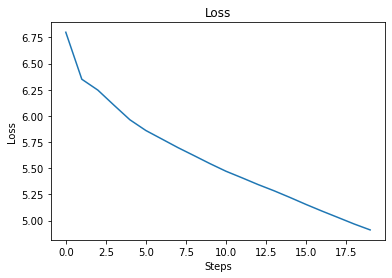

In [32]:
plt.plot(range(epochs), history.history['loss'])
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')

In [14]:
model.save_weights('./model_weights')

## Evaluation
Before the model is ready to spit out some raps, a preprocessing function needs to be written. <br>

In [29]:
def generate_text(seed_text, next_words, model, max_sequence_length):
    # ensure that the input is also cleaned.
    seed_text = preprocess_lyrics(seed_text)
    # predict next words.
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

## NLP concert
Ladies and gentlemen, I introduce to you, Young NLP!

<img src="robotem.jpg" alt="Kitten" title="Robot Eminem" width="300" height="250" />

In [30]:
generate_text("I will kill you", 50, model, max_sequence_length)

'I will kill you i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal i am'

In [31]:
print(generate_text("Hello I am slim", 20, model, max_sequence_length))
print(generate_text("Who me me me me", 20, model, max_sequence_length))
print(generate_text("My main man fifty", 20, model, max_sequence_length))
print(generate_text("Will the real slim shady please", 20, model, max_sequence_length))
print(generate_text("The illest man to be alive", 20, model, max_sequence_length))
print(generate_text("Far in the galaxy", 20, model, max_sequence_length))
print(generate_text("The unknown is going to happen", 20, model, max_sequence_length))

Hello I am slim shady i am a criminal i am a criminal i am a criminal i am a criminal i am a
Who me me me me i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal
My main man fifty people i am a criminal i am a criminal i am a criminal i am a criminal i am a
Will the real slim shady please stand up and i am a criminal i am a criminal i am a criminal i am a criminal i
The illest man to be alive i am a criminal i am a criminal i am a criminal i am a criminal i am a criminal
Far in the galaxy fuck i am a criminal i am a criminal i am a criminal i am a criminal i am a
The unknown is going to happen to the same rock i am a criminal i am a criminal i am a criminal i am a criminal


# Conclusion
I have experimented with the huggingface pipeline API and tried several NLP tasks. <br>
For the assignment I have chosen to do, the gathering and preprocessing of the data went fairly smoothly. <br>
The model was not extensively tuned nor trained but I think that it would not have helped its performance. <br>
The key thing that is lacking in this task is good structure in sentences and less repetition (chorus, etc). <br>
Which is something that rappers do not necessarily have in their lyrics. <br>
However, I do think that if I were to add a lot more lyrics from other rappers it might perform better. <br>
And, something noteworthy, the rapping NLP model really wants the audience to know that he is a criminal. <br>

# References
\[1\] Janssen, O. (2020). NLP Introduction Overview. Olafjanssen.github.io. Retrieved from https://olafjanssen.github.io/nlp-workshop/. <br>
\[2\] Wolf et al (2019). HuggingFace's Transformers: State-of-the-art Natural Language Processing. Huggingface.co. Retrieved from https://huggingface.co/transformers/. <br>
\[3\] Genius. Song Lyrics & Knowledge. Genius.com. Retrieved from https://docs.genius.com/. <br>